In [ ]:
from bs4 import BeautifulSoup
import requests
import random

In [ ]:
def get_movies(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    movies = soup.find_all("h3", class_="lister-item-header")
    random.shuffle(movies)
    return movies

def get_summary(url):
    movie_page = requests.get(url)
    soup = BeautifulSoup(movie_page.text, 'html.parser')
    return soup.find("div", class_="summary_text").contents[0].strip()

def get_reviews(url):
    reviews_page = requests.get(url)
    soup = BeautifulSoup(reviews_page.text, 'html.parser')
    return soup.find("div", class_="lister-list")
  
def get_movie_info(movie):
    title = movie.a.contents[0]
    year = movie.span.contents[0]
    url = 'http://www.imdb.com' + movie.a['href']
    return title, year, url



def get_user_yn(message):
    while True:
        answer = input(message).upper()
        if answer in ('Y', 'N'):
            return answer == 'Y'
        print("Invalid input. Please enter a Y or a N. ")

rates = []
data = []
errors_n = 0
errors = []
items_n = 0

urls = [
    'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating',
    'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=201&ref_=adv_nxt',
    'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=301&ref_=adv_nxt',
    'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=401&ref_=adv_nxt',
    'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=501&ref_=adv_nxt',
    'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=601&ref_=adv_nxt',
    'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=701&ref_=adv_nxt',
    'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=801&ref_=adv_nxt',
    'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=901&ref_=adv_nxt',
]
movies = []
for url in urls:
    movies += get_movies(url)

for movie in tqdm.tqdm(movies):
    pack = {}

    # title, year, url = get_movie_info(movie)
    title, year, url = get_movie_info(movie)
    pack['title'] = title
    pack['url'] = url

    # summary = get_summary(url)
    # reviews = get_reviews(f'https://www.imdb.com/title{movie.a["href"]}reviews')

    reviews_page_url = f'https://www.imdb.com{movie.a["href"]}reviews'
    reviews_page = requests.get(reviews_page_url)
    soup = BeautifulSoup(reviews_page.text, 'html.parser')
    items = soup.find("div", class_="lister-list").find_all("div", class_="lister-item")

    pack['rated_reviews'] = []
    pack['unrated_reviews'] = []
    for item in items:
        items_n += 1
        try:
            text = item.find('div', class_='text show-more__control').text
            rate = int(item.find('span', class_='rating-other-user-rating').find('span').text)
            pack['rated_reviews'].append([text, rate])
            rates.append(rate)
        except Exception as e:
            errors_n += 1
            errors.append(e)
            pack['unrated_reviews'].append([text])

    data.append(pack)

100%|██████████| 800/800 [16:31<00:00,  1.24s/it]


In [ ]:
print(errors_n, items_n)

2450 19928


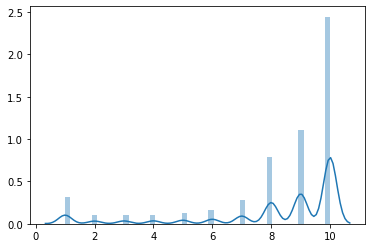

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(rates)
plt.show()

In [ ]:
from collections import Counter
Counter(rates)

Counter({1: 1006,
         2: 315,
         3: 331,
         4: 338,
         5: 414,
         6: 528,
         7: 892,
         8: 2469,
         9: 3494,
         10: 7691})

In [ ]:
import os

root = "drive/My Drive/Colab Notebooks/imdb/"

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import json
dump_path = os.path.join(root, 'imdb.json')

with open(file=dump_path, mode='w') as f:
    json.dump(data, f)